In [1]:
import pandas as pd
import seaborn as sn 

In [2]:
df = pd.read_csv("C://Users//LENOVO/Desktop/new py/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.2+ KB


In [6]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique()) 
print(df['Transmission'].unique()) 
print(df['Owner'].unique()) 

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
#remove Identifiers
df_required= df.drop("Car_Name",axis=1)

#Data Pre-Processing 

# extracting age of car
df_required['Present_Year']=2020
df_required.head()

In [9]:
df_required['Age_Year']=df_required['Present_Year']-df_required ['Year']
df_required.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Year,Age_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [10]:
df_required.drop(['Year','Present_Year'],axis=1,inplace=True)

In [11]:
df_required.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [12]:
df_required= pd.get_dummies(df_required,drop_first=True)
df_required.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [13]:
df_required_x=df_required.drop('Selling_Price',axis=1)

# OUTLIER ANALYSIS

In [15]:
#Using Z-score
from scipy.stats import zscore
df_required['Zscore_SP']=zscore(df_required.Selling_Price)
df_required[(df_required.Zscore_SP >3.0)|(df_required.Zscore_SP <-3.0)]


,Selling_Price,Present_Price,Kms_Driven,Owner,Age_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Zscore_SP
51,23.00,30.61,40000,0,5,1,0,0,0,3.613993
59,19.99,35.96,41000,0,6,1,0,0,0,3.020815
63,23.50,35.96,47000,0,5,1,0,0,0,3.712527
64,33.00,36.23,6000,0,3,1,0,0,0,5.584684
82,23.00,25.39,15000,0,3,1,0,0,0,3.613993
86,35.00,92.60,78000,0,10,1,0,0,1,5.978822
93,23.00,30.61,40000,0,5,1,0,0,0,3.613993
96,20.75,25.39,29000,0,4,1,0,0,0,3.170587


{'whiskers': [<matplotlib.lines.Line2D at 0x279b2896630>,
 'caps': [<matplotlib.lines.Line2D at 0x279b2896cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x279b2896240>],
 'medians': [<matplotlib.lines.Line2D at 0x279b28ac390>],
 'fliers': [<matplotlib.lines.Line2D at 0x279b28ac6d8>],
 'means': []}

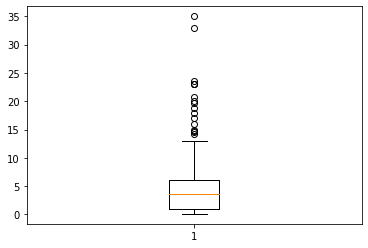

In [18]:
import matplotlib.pyplot as plt
plt.boxplot(df_required['Selling_Price'])

# Multi-Collinearity= existance of high co-relation b|w independent variables.

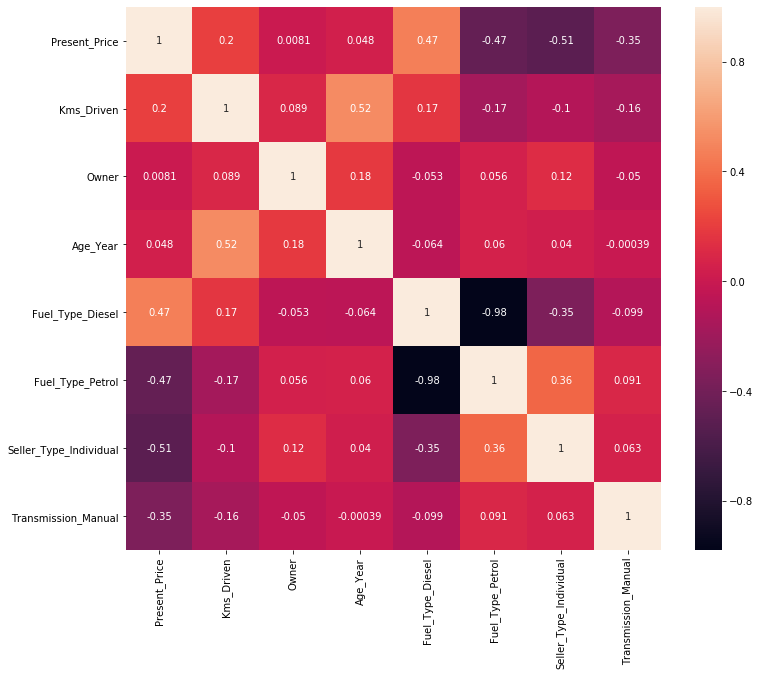

In [19]:
plt.figure(figsize=(12,10))
sn.heatmap(df_required_x.corr(), annot=True)

# Test and Train data

In [23]:
import statsmodels.api as sm

In [24]:
x= sm.add_constant(df_required_x)
y= df_required.iloc[:,0]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
import sklearn
from sklearn.model_selection import train_test_split

In [28]:
train_x, test_x, train_y, test_y = train_test_split(x,
                                                y,
                                                 train_size=0.8
                                                 random_state= 100)

SyntaxError: invalid syntax (<ipython-input-28-579b3798afa7>, line 4)

# Model Creation

In [31]:
Model_1 =sm.OLS(train_y, train_x).fit() 

NameError: name 'train_y' is not defined